<a href="https://colab.research.google.com/github/Murtadha9/student_lifestyle_Machine_Learning/blob/main/student_lifestyle_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset

This dataset provides a detailed view of student lifestyle patterns and their correlation with academic performance, represented by GPA. It contains 2,000 records of students' daily habits across study, extracurriculars, sleep, socializing, and physical activities. Each student's stress level is derived based on study and sleep hours, offering insights into how lifestyle factors may impact academic outcomes.


[https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset/data]

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d steve1215rogg/student-lifestyle-dataset

Dataset URL: https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset
License(s): apache-2.0
  0% 0.00/21.6k [00:00<?, ?B/s]
100% 21.6k/21.6k [00:00<00:00, 42.6MB/s]


In [3]:
!unzip /content/student-lifestyle-dataset.zip

Archive:  /content/student-lifestyle-dataset.zip
  inflating: student_lifestyle_dataset.csv  


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, feature_selection, svm, metrics, pipeline, preprocessing , impute , tree , ensemble , neighbors
import seaborn as sns
from tqdm import tqdm
from imblearn.over_sampling import RandomOverSampler

In [5]:
dataset=pd.read_csv("/content/student_lifestyle_dataset.csv")

In [6]:
dataset

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [8]:
dataset.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [9]:
dataset.isna().sum()

,0
Student_ID,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


In [10]:
dataset['Stress_Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [11]:
# Create tokenizer function to convert the labels to numerical values
def tokenizer(col):
    word_id={}
    id_word = {}
    for id,word in enumerate(col.unique()):
        word_id[word]=id
        id_word[id] = word
    return word_id,id_word

In [12]:
Stress_Level_id,id_Stress_Level=tokenizer(dataset.Stress_Level)
dataset.Stress_Level.replace(Stress_Level_id,inplace=True)

<ipython-input-12-fe165f932ca4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.Stress_Level.replace(Stress_Level_id,inplace=True)
<ipython-input-12-fe165f932ca4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.Stress_Level.replace(Stress_Level_id,inplace=True)


In [13]:
dataset

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,0
1,2,5.3,3.5,8.0,4.2,3.0,2.75,1
2,3,5.1,3.9,9.2,1.2,4.6,2.67,1
3,4,6.5,2.1,7.2,1.7,6.5,2.88,0
4,5,8.1,0.6,6.5,2.2,6.6,3.51,2
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,0
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,0
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,0
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,2


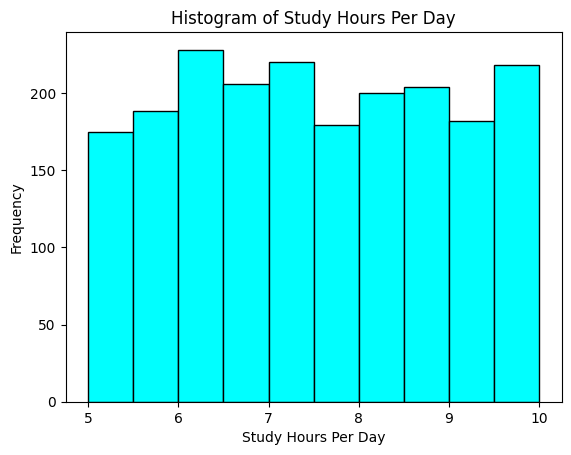

In [58]:
plt.hist(dataset["Study_Hours_Per_Day"], bins=10, color='cyan', edgecolor='black')
plt.xlabel("Study Hours Per Day")
plt.ylabel("Frequency")
plt.title("Histogram of Study Hours Per Day")
plt.show()

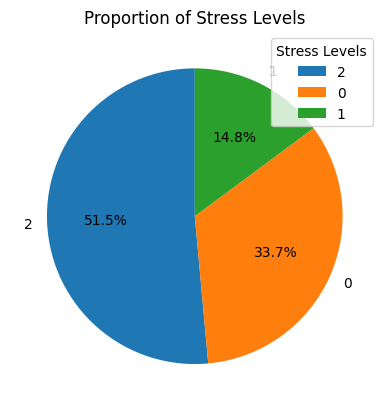

In [59]:
counts = dataset["Stress_Level"].value_counts()
labels = counts.index

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Stress Levels")
plt.legend(title="Stress Levels")
plt.show()

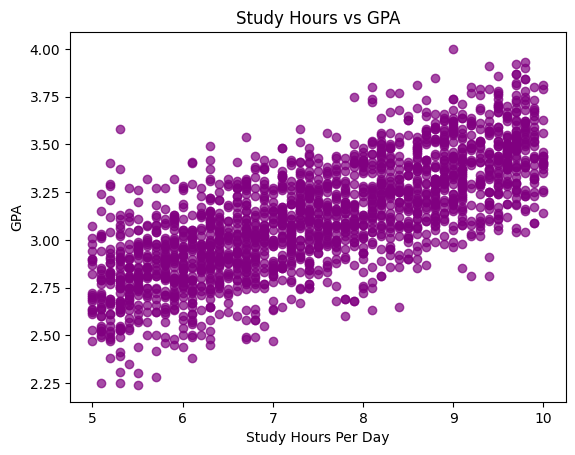

In [60]:
plt.scatter(dataset["Study_Hours_Per_Day"], dataset["GPA"], color='purple', alpha=0.7)
plt.xlabel("Study Hours Per Day")
plt.ylabel("GPA")
plt.title("Study Hours vs GPA")
plt.show()

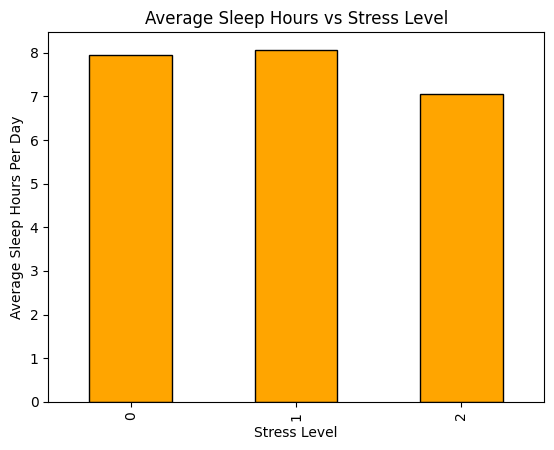

In [61]:
avg_sleep = dataset.groupby("Stress_Level")["Sleep_Hours_Per_Day"].mean()

avg_sleep.plot(kind="bar", color="orange", edgecolor="black")
plt.xlabel("Stress Level")
plt.ylabel("Average Sleep Hours Per Day")
plt.title("Average Sleep Hours vs Stress Level")
plt.show()

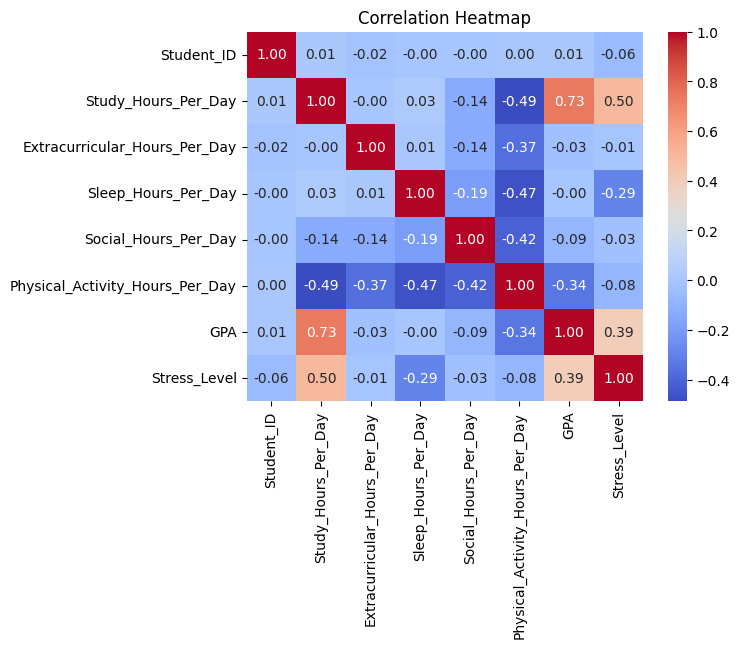

In [63]:
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
dataset["Stress_Level"].value_counts()

,count
Stress_Level,
2,1029
0,674
1,297


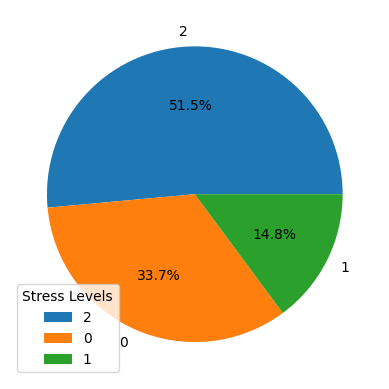

In [52]:
counts = dataset["Stress_Level"].value_counts()
labels = counts.index  # Extract the unique stress levels as a flat list

# Plot the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.legend(title="Stress Levels")
plt.show()

# we need to balance the target

In [45]:
# Split the dataset to x,y
x = dataset.drop(columns=['Stress_Level'])
y = dataset.Stress_Level

ros = RandomOverSampler()
x ,y = ros.fit_resample(x,y)

In [48]:
y.value_counts()

,count
Stress_Level,
0,1029
1,1029
2,1029


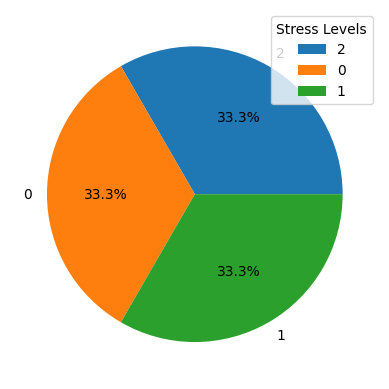

In [51]:
labels = counts.index  # Extract the unique stress levels as a flat list

# Plot the pie chart
plt.pie(y.value_counts(), labels=labels, autopct='%1.1f%%')
plt.legend(title="Stress Levels")
plt.show()

In [17]:
x.shape , y.shape

((3087, 7), (3087,))

#Normalize the features

In [18]:
# First of all call the   StandardScaler class
x_normalizer = preprocessing.StandardScaler()
# Use the fit method to get mean and std from the features
x_normalizer.fit(x)
# Apply the StandardScaler transformation on the features
x_norm = x_normalizer.transform(x)

# Split the dataset to training and testing

In [19]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_norm, y, test_size=0.2, random_state=42, stratify=y
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2469, 7), (618, 7), (2469,), (618,))

#Models

#KNN

In [29]:
model_knn=neighbors.KNeighborsClassifier(n_neighbors=2)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [32]:
y_pred = model_knn.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       206
           1       0.95      0.96      0.95       206
           2       0.98      0.83      0.90       206

    accuracy                           0.91       618
   macro avg       0.92      0.91      0.91       618
weighted avg       0.92      0.91      0.91       618



#Decision Tree


In [31]:
model_tree=tree.DecisionTreeClassifier()
model_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred = model_tree.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       206
           2       1.00      1.00      1.00       206

    accuracy                           1.00       618
   macro avg       1.00      1.00      1.00       618
weighted avg       1.00      1.00      1.00       618



#Plot the Tree

[Text(0.5, 0.875, 'x[1] <= -0.691\ngini = 0.667\nsamples = 2469\nvalue = [823, 823, 823]'),
 Text(0.25, 0.625, 'x[3] <= -1.244\ngini = 0.112\nsamples = 875\nvalue = [0, 823, 52]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 52\nvalue = [0, 0, 52]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 823\nvalue = [0, 823, 0]'),
 Text(0.75, 0.625, 'x[1] <= 0.769\ngini = 0.499\nsamples = 1594\nvalue = [823, 0, 771]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[3] <= -1.244\ngini = 0.271\nsamples = 982\nvalue = [823, 0, 159]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 159\nvalue = [0, 0, 159]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 823\nvalue = [823, 0, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 612\nvalue = [0, 0, 612]')]

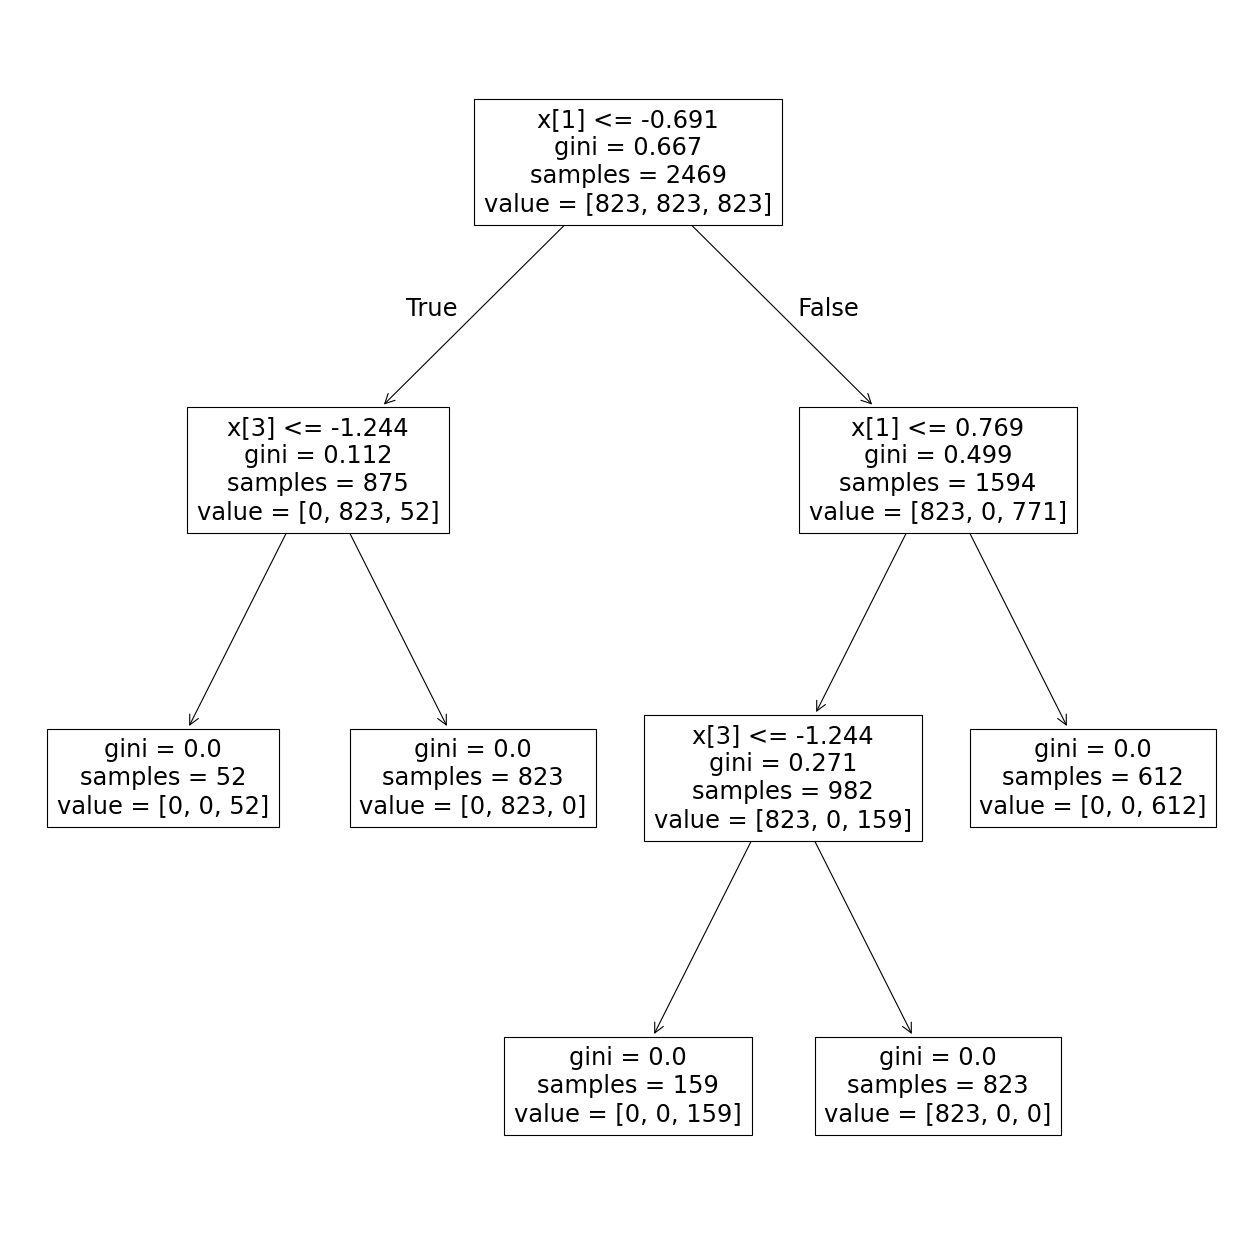

In [34]:
plt.figure(figsize=(20, 20), dpi=80)
tree.plot_tree(model_tree)

#Support Vector Machine

In [35]:
model_svm=svm.SVC(kernel="rbf")
model_svm.fit(x_train,y_train)

SVC()

In [36]:
y_pred = model_svm.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       206
           1       0.92      0.99      0.95       206
           2       0.94      0.97      0.96       206

    accuracy                           0.94       618
   macro avg       0.95      0.94      0.94       618
weighted avg       0.95      0.94      0.94       618



#Random Forest


In [53]:
model_forest=ensemble.RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=10, n_estimators=100,)
model_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [54]:
y_pred = model_forest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       206
           2       1.00      1.00      1.00       206

    accuracy                           1.00       618
   macro avg       1.00      1.00      1.00       618
weighted avg       1.00      1.00      1.00       618

